# Veille

> **Qu'est ce que le clustering ?**

Le clustering est du ML non supervisé. Il existe plusieurs types de clustering : Partitional (dont K-means), Hierarchical, et Density-based. Le clustering consiste à séparer les données en entrée en groupes le plus distincts possibles, basé sur les similarités de leurs features.

> **Quelle est la compléxité d'un probléme de clustering ?**

La complexité d'un problème de clustering dépend du nombre de features du dataset analysé ainsi que du nombre de cluster ciblés.

> **Quelles sont les métriques utilisées pour le clustering ?**

Il existe plusieurs métriques pour le clustering, dont :
* homogeneity: A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
* completeness: A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
* adjusted rand index (ARI): The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
* adjusted mutual info (AMI): Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared.   
* normalized mutual info (NMI): Normalized Mutual Information (NMI) is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation)
* silhouette: The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.

> **Séparer les métrique avec "ground truth" et "sans "ground truth".**

Homogeneity, completeness, adjusted rand index (ARI), adjusted mutual info (AMI), et normalized mutual info (NMI) sont des métriques avec "ground truth". Silhouette est une métrique sans "ground truth".

> **Différence entre NMI et AMI ?**

Le NMI donne un score normalisé entre 0 et 1, et contrairement à l'AMI n'est pas ajusté à la chance ("adjusted for chance").

# Digits analysis

On tente d'analyser le dataset 'digits' de SciKit-learn avec K-means :

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

digits = load_digits()
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)

(1797, 64)
(1797, 8, 8)
(1797,)


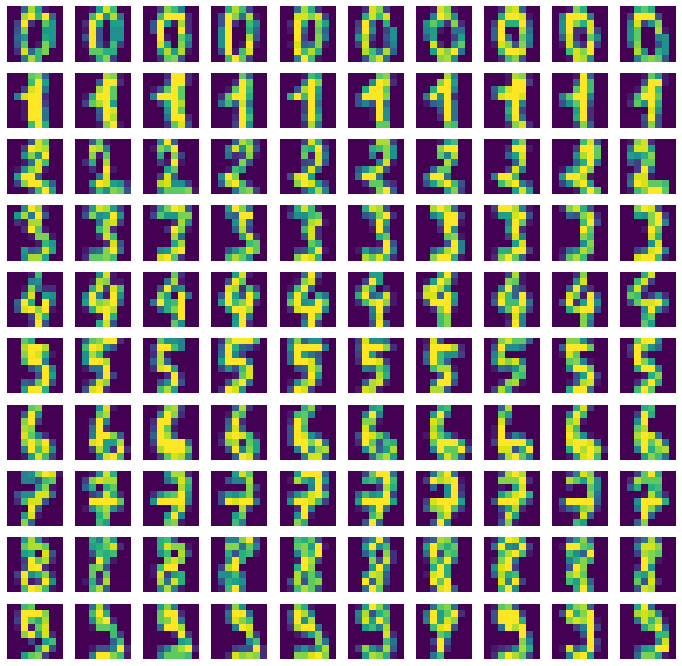

In [2]:
X = digits.images
Y = digits.target
n_digits = np.unique(Y)
M = 10
dim = int(np.sqrt(X.shape[1]))
fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j])
        axs[i,j].axis('off')

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(digits.data)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=10, random_state=42)

In [6]:
kmeans.cluster_centers_

array([[ 0.00000000e+00, -1.86350077e-01,  6.55712241e-03,
         3.65331296e-01,  5.89876199e-01,  8.72550625e-01,
         8.06855534e-01,  1.07909668e-01, -5.90775571e-02,
        -2.75882434e-01,  1.06711435e-01, -1.79901105e-01,
         4.84970756e-02,  7.33153008e-01,  7.29157044e-01,
        -8.29203059e-02, -4.46250733e-02, -4.08666753e-01,
        -8.79615802e-01, -8.65508528e-01,  6.05715092e-02,
         6.63275276e-01,  2.18309827e-01, -1.01409319e-01,
        -3.33797263e-02, -5.11855295e-01, -7.50760377e-01,
        -3.34524097e-01,  5.01454352e-01,  7.85472396e-01,
         6.85115376e-01, -4.72323823e-02,  0.00000000e+00,
        -2.47722485e-01,  2.14338817e-01,  7.34423230e-01,
         7.92062324e-01,  3.32698376e-01,  3.46559613e-01,
         0.00000000e+00, -6.13436689e-02, -1.63786413e-01,
        -2.40582589e-01,  7.06992889e-01,  5.17417722e-01,
        -8.04223545e-01, -6.59436484e-01, -8.87416172e-02,
        -3.54332626e-02, -3.58519607e-01, -7.80771001e-0

In [7]:
kmeans.inertia_

69671.80496339033

In [8]:
kmeans.n_iter_

28

In [9]:
kmeans.labels_[:5]

array([7, 8, 8, 6, 4], dtype=int32)

# Visualizing digits clustering with PCA

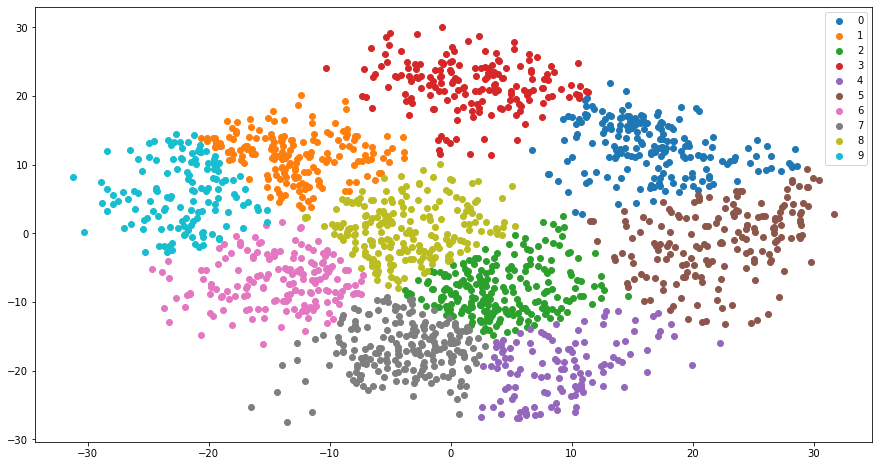

In [36]:
pca = PCA(2)
datatr = pca.fit_transform(data)
model2 = kmeans.fit_predict(datatr)
unique_labels = np.unique(model2)
fig = plt.figure(1, figsize=(15,8))
for i in unique_labels:
    plt.scatter(datatr[model2 == i, 0], datatr[model2 == i, 1], label = i)
plt.legend()
plt.show()

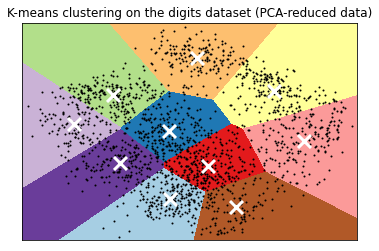

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = digits.data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

centroids = kmeans.cluster_centers_

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower")
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

En se basant sur une visualisation de K-means on 2 dimensions, on semble obtenir des clusters à peu près homogènes, mais il est difficile de dire s'ils correspondent exactement aux chiffres du dataset.

# Digits: Scores

On analyse le dataset 'digits' en utilisant plusieurs variantes de K-means :

In [18]:
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [55]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def bench_k_means(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
        metrics.normalized_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]
    results += [metrics.silhouette_score(data, estimator[-1].labels_,metric="euclidean", sample_size=300,)]
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [25]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tNMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	NMI	silhouette
k-means++	0.339s	69485	0.613	0.660	0.636	0.482	0.632	0.636	0.153
random   	0.101s	69952	0.545	0.616	0.578	0.415	0.574	0.578	0.122
PCA-based	0.031s	74152	0.653	0.683	0.668	0.539	0.664	0.668	0.144
__________________________________________________________________________________


On obtient un score tournant autour des 66% (au mieux), indiquant que seul 2/3 des chiffres seraient correctement identifiés.

# Emotion analysis

On tente d'analyser le dataset Emotions_final.csv avec K-means :

In [27]:
import pandas as pd

dataEF = pd.read_csv('Emotion_final.csv')

dataEF.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

stopwords = nltk.corpus.stopwords.words("english")
targets = dataEF['Emotion']
corpus = dataEF['Text']

vectorizer = CountVectorizer(stop_words = stopwords)
X = vectorizer.fit_transform(corpus)

scaler = StandardScaler(with_mean=False)
scaled_features = scaler.fit_transform(X)
kmeans2 = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans2.fit(scaled_features)

KMeans(init='random', n_clusters=6, random_state=42)

In [49]:
kmeans2.inertia_

408905601.1874554

In [50]:
kmeans2.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00965677, 0.00965677, 0.00965677, ..., 0.01182735, 0.00682821,
        0.00682821],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [80]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def bench_k_means2(kmeans, name, data, labels):
    t0 = time()
#    estimator = make_pipeline(StandardScaler(with_mean=False), kmeans).fit(data)
    estimator = kmeans.fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator.inertia_]

    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
        metrics.normalized_mutual_info_score,
    ]
    results += [m(labels, estimator.labels_) for m in clustering_metrics]
    results += [metrics.silhouette_score(data, estimator.labels_,metric="euclidean", sample_size=300,)]
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [81]:
from sklearn.decomposition import TruncatedSVD

print(98 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tNMI\tsilhouette')

targets_nb = targets.replace(['happy','sadness','anger','fear','love','surprise'],[1,2,3,4,5,6])

kmeans2 = KMeans(init="k-means++", n_clusters=6, n_init=4,random_state=0)
bench_k_means2(kmeans=kmeans2, name="k-means++", data=X, labels=targets_nb)

kmeans2 = KMeans(init="random", n_clusters=6, n_init=4, random_state=0)
bench_k_means2(kmeans=kmeans2, name="random", data=X, labels=targets_nb)

tsvd = TruncatedSVD(n_components=6).fit(X)
kmeans2 = KMeans(init=tsvd.components_, n_clusters=6, n_init=1)
bench_k_means2(kmeans=kmeans2, name="SVD-based", data=X, labels=targets_nb)

print(98 * '_')

__________________________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	NMI	silhouette
k-means++	0.961s	185318	0.006	0.007	0.006	0.007	0.006	0.006	0.042
random   	0.770s	186061	0.003	0.005	0.004	0.000	0.004	0.004	0.032
SVD-based	0.135s	184290	0.007	0.008	0.008	0.011	0.007	0.008	0.045
__________________________________________________________________________________________________


Les scores obtenus avec K-means sur ce dataset sont très faibles.

### Emotions: Visualization

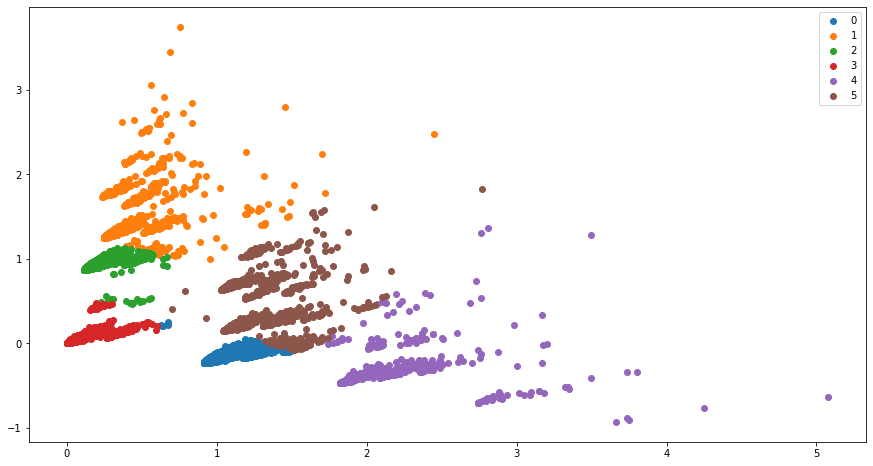

In [83]:
tsvd2 = TruncatedSVD(2)
kmeans3 = KMeans(init="random", n_clusters=6, n_init=4, random_state=0)
datatr2 = tsvd2.fit_transform(X)
model22 = kmeans3.fit_predict(datatr2)
unique_labels2 = np.unique(model22)
fig = plt.figure(1, figsize=(15,8))
for i in unique_labels2:
    plt.scatter(datatr2[model22 == i, 0], datatr2[model22 == i, 1], label = i)
plt.legend()
plt.show()

Basé sur la visualisation via TruncatedSVD, on peut voir que les 'blobs' du dataset ne correspondent pas auc clusters trouvés par K-means, et donc que K-means n'est pas un algorithme adapté au traitement de ce dataset.